# MLFN Lab1

recognize type of attack on internet

## Data Preprocessing

### Load datasets

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7403654052334734057
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10084089856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9547989296507958038
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
import pandas as pd
df = pd.read_csv("Datasets/kddcup.data_10_percent.txt")

In [3]:
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Load header of datasets

In [4]:
lines = None
with open("Datasets/kddcup.names") as f:
    lines = f.readlines()
column_name = [line.split(":")[0] for line in lines[1:]]
column_type = [(line.split(":")[0], line.split(":")[1].strip()) for line in lines[1:]]
column_type = dict(column_type)
column_name

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [5]:
column_name.append("attk_type")
df.columns = column_name

In [6]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attk_type
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494014,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494015,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


### Mapping symbolic feature form texts to numbers

#### protocol_type

In [7]:
all_protocol_type = df["protocol_type"].unique()

protocol_type_mapping = dict(zip(all_protocol_type, range(len(all_protocol_type))))
protocol_type_mapping

{'tcp': 0, 'udp': 1, 'icmp': 2}

In [8]:
df['protocol_type'] = df['protocol_type'].map(protocol_type_mapping)

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attk_type
0,0,0,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,0,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,0,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,0,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,0,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


#### flag

In [10]:
all_flag = df["flag"].unique()

flag_mapping = dict(zip(all_flag, range(len(all_flag))))
flag_mapping

{'SF': 0,
 'S1': 1,
 'REJ': 2,
 'S2': 3,
 'S0': 4,
 'S3': 5,
 'RSTO': 6,
 'RSTR': 7,
 'RSTOS0': 8,
 'OTH': 9,
 'SH': 10}

In [11]:
df['flag'] = df['flag'].map(flag_mapping)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attk_type
0,0,0,http,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,0,http,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,0,http,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,0,http,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,0,http,0,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


#### service

In [12]:
all_serv = df["service"].unique()

serv_mapping = dict(zip(all_serv, range(len(all_serv))))
serv_mapping

{'http': 0,
 'smtp': 1,
 'finger': 2,
 'domain_u': 3,
 'auth': 4,
 'telnet': 5,
 'ftp': 6,
 'eco_i': 7,
 'ntp_u': 8,
 'ecr_i': 9,
 'other': 10,
 'private': 11,
 'pop_3': 12,
 'ftp_data': 13,
 'rje': 14,
 'time': 15,
 'mtp': 16,
 'link': 17,
 'remote_job': 18,
 'gopher': 19,
 'ssh': 20,
 'name': 21,
 'whois': 22,
 'domain': 23,
 'login': 24,
 'imap4': 25,
 'daytime': 26,
 'ctf': 27,
 'nntp': 28,
 'shell': 29,
 'IRC': 30,
 'nnsp': 31,
 'http_443': 32,
 'exec': 33,
 'printer': 34,
 'efs': 35,
 'courier': 36,
 'uucp': 37,
 'klogin': 38,
 'kshell': 39,
 'echo': 40,
 'discard': 41,
 'systat': 42,
 'supdup': 43,
 'iso_tsap': 44,
 'hostnames': 45,
 'csnet_ns': 46,
 'pop_2': 47,
 'sunrpc': 48,
 'uucp_path': 49,
 'netbios_ns': 50,
 'netbios_ssn': 51,
 'netbios_dgm': 52,
 'sql_net': 53,
 'vmnet': 54,
 'bgp': 55,
 'Z39_50': 56,
 'ldap': 57,
 'netstat': 58,
 'urh_i': 59,
 'X11': 60,
 'urp_i': 61,
 'pm_dump': 62,
 'tftp_u': 63,
 'tim_i': 64,
 'red_i': 65}

In [13]:
df['service'] = df['service'].map(serv_mapping)
df['service']

0         0
1         0
2         0
3         0
4         0
         ..
494014    0
494015    0
494016    0
494017    0
494018    0
Name: service, Length: 494019, dtype: int64

#### attk_type

In [14]:
all_attk_type = df["attk_type"].unique()
all_attk_type

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [15]:
def read_as_dict(path) -> dict:
    _map = {}
    with open(path) as f:
        for line in f.readlines():
            if line.strip() == "":
                continue
            tokens = line.strip().split(" ")
            _map[tokens[0]+"."] = tokens[1]
    return _map

In [16]:
attk_types = read_as_dict("Datasets/training_attack_types")
attk_types

{'back.': 'dos',
 'buffer_overflow.': 'u2r',
 'ftp_write.': 'r2l',
 'guess_passwd.': 'r2l',
 'imap.': 'r2l',
 'ipsweep.': 'probe',
 'land.': 'dos',
 'loadmodule.': 'u2r',
 'multihop.': 'r2l',
 'neptune.': 'dos',
 'nmap.': 'probe',
 'perl.': 'u2r',
 'phf.': 'r2l',
 'pod.': 'dos',
 'portsweep.': 'probe',
 'rootkit.': 'u2r',
 'satan.': 'probe',
 'smurf.': 'dos',
 'spy.': 'r2l',
 'teardrop.': 'dos',
 'warezclient.': 'r2l',
 'warezmaster.': 'r2l'}

In [17]:
attk_types['normal.'] = 'normal.'
df['attk_type'] = df['attk_type'].map(attk_types)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attk_type
0,0,0,0,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,0,0,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,0,0,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,0,0,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,0,0,0,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [18]:
all_attk_type = df['attk_type'].unique()
attk_mapping = dict(zip(all_attk_type, range(len(all_attk_type))))
attk_mapping

{'normal.': 0, 'u2r': 1, 'dos': 2, 'r2l': 3, 'probe': 4}

In [19]:
df['attk_type'] = df['attk_type'].map(attk_mapping)
df['attk_type']

0         0
1         0
2         0
3         0
4         0
         ..
494014    0
494015    0
494016    0
494017    0
494018    0
Name: attk_type, Length: 494019, dtype: int64

In [20]:
df[df['attk_type']==0].count()

duration                       97276
protocol_type                  97276
service                        97276
flag                           97276
src_bytes                      97276
dst_bytes                      97276
land                           97276
wrong_fragment                 97276
urgent                         97276
hot                            97276
num_failed_logins              97276
logged_in                      97276
num_compromised                97276
root_shell                     97276
su_attempted                   97276
num_root                       97276
num_file_creations             97276
num_shells                     97276
num_access_files               97276
num_outbound_cmds              97276
is_host_login                  97276
is_guest_login                 97276
count                          97276
srv_count                      97276
serror_rate                    97276
srv_serror_rate                97276
rerror_rate                    97276
s

### data visualization

array([[<AxesSubplot: title={'center': 'protocol_type'}>]], dtype=object)

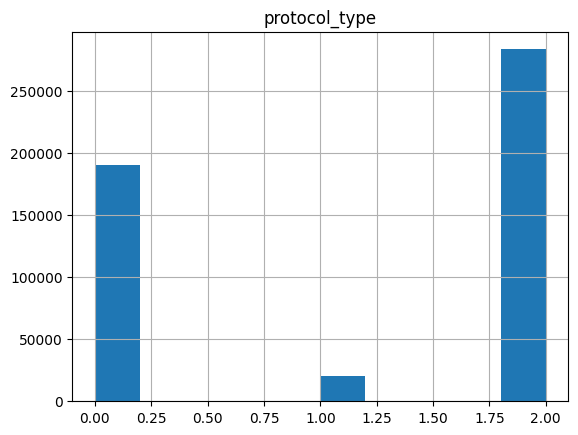

In [21]:
features = ["protocol_type"]
df[features].hist()
# {'tcp': 0, 'udp': 1, 'icmp': 2}

array([[<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

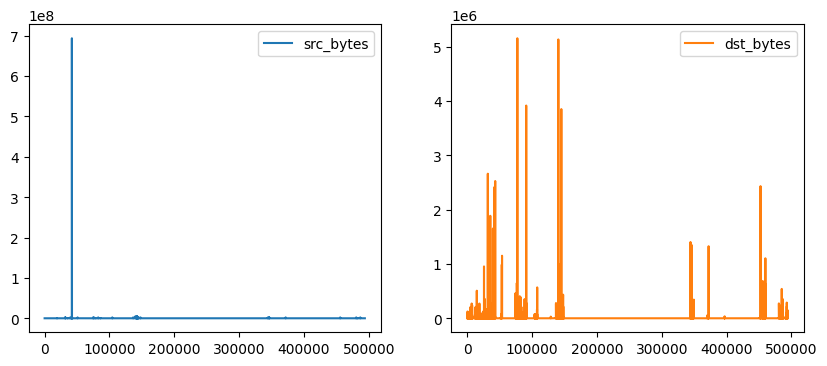

In [22]:
features = ["src_bytes", "dst_bytes"]
df[features].plot(subplots=True, layout=(1, 2), figsize=(10, 4), sharex=False)

In [23]:
df["src_bytes"].median()

520.0

In [24]:
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<AxesSubplot: >

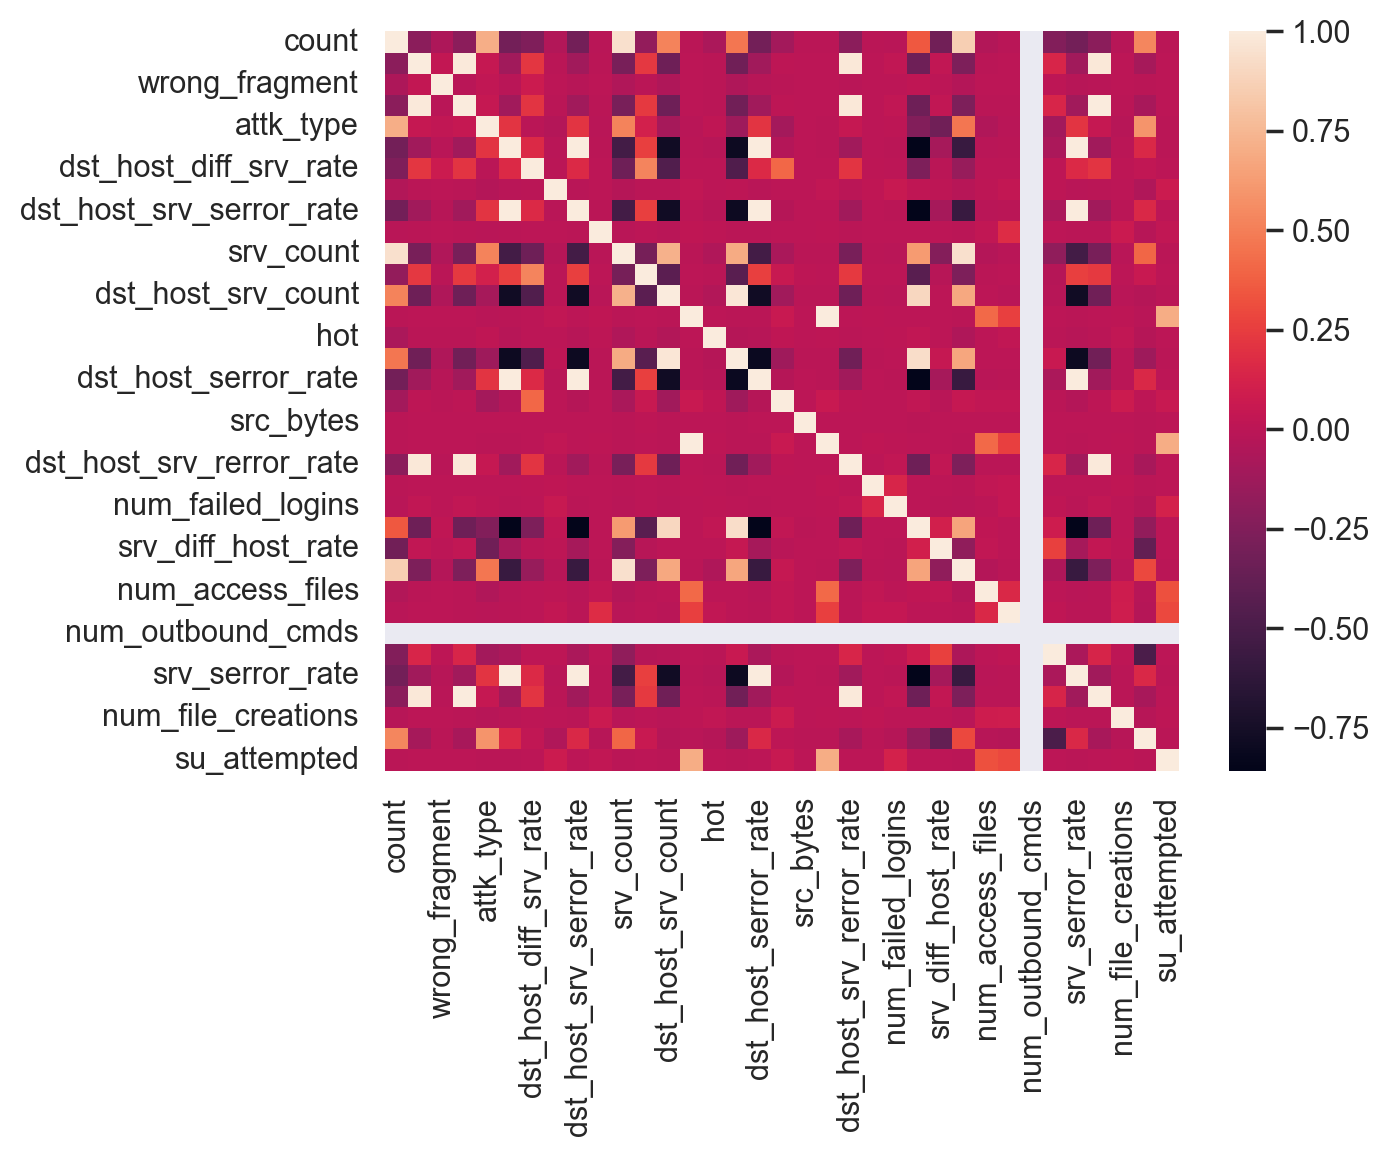

In [25]:
numerical = list(
    set(df.columns)
    - {col for col in df.columns if column_type.get(col) == "symbolic."}
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

### Feature selection

#### By SelectFromModel with RandomForest

先透過隨機森林來選出重要的feature

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

features = list(
    set(df.columns) - {
        "attk_type"
    }
)
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(df[features], df["attk_type"])
is_preserved = zip(df.columns, selector.get_support())

In [27]:
selected_feature = []
for f in is_preserved:
    if f[1] == True:
        selected_feature.append(f[0])
print(selected_feature)
df_selected = df[selected_feature]
df_selected

['duration', 'protocol_type', 'wrong_fragment', 'hot', 'num_compromised', 'num_access_files', 'is_host_login', 'count', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate']


,duration,protocol_type,wrong_fragment,hot,num_compromised,num_access_files,is_host_login,count,diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate
0,0,0,0,0,0,0,0,8,0.0,0.05,0.0
1,0,0,0,0,0,0,0,8,0.0,0.03,0.0
2,0,0,0,0,0,0,0,6,0.0,0.03,0.0
3,0,0,0,0,0,0,0,6,0.0,0.02,0.0
4,0,0,0,0,0,0,0,6,0.0,0.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...
494014,0,0,0,0,0,0,0,4,0.0,0.01,0.0
494015,0,0,0,0,0,0,0,6,0.0,0.17,0.0
494016,0,0,0,0,0,0,0,6,0.0,0.06,0.0
494017,0,0,0,0,0,0,0,6,0.0,0.04,0.0


#### add feature by human(which i think importance)

su_attempted: 如果嘗試很多次su，有可能是暴力破解

protocol_type: 通常DDOS會用UDP來塞網路流量

num_access_files: 一次存取非常大量的檔案很可能是攻擊行為

In [28]:
add_features = ["protocol_type", "su_attempted", "num_access_files"]
df_test_mod = df_selected.copy()
for f in add_features:
    df_test_mod[f] = df[f]
df_test_mod

,duration,protocol_type,wrong_fragment,hot,num_compromised,num_access_files,is_host_login,count,diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,su_attempted
0,0,0,0,0,0,0,0,8,0.0,0.05,0.0,0
1,0,0,0,0,0,0,0,8,0.0,0.03,0.0,0
2,0,0,0,0,0,0,0,6,0.0,0.03,0.0,0
3,0,0,0,0,0,0,0,6,0.0,0.02,0.0,0
4,0,0,0,0,0,0,0,6,0.0,0.02,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
494014,0,0,0,0,0,0,0,4,0.0,0.01,0.0,0
494015,0,0,0,0,0,0,0,6,0.0,0.17,0.0,0
494016,0,0,0,0,0,0,0,6,0.0,0.06,0.0,0
494017,0,0,0,0,0,0,0,6,0.0,0.04,0.0,0


## feature transformations

In [29]:
from sklearn.preprocessing import RobustScaler

symbolic_feature = {sym for sym in df_test_mod.columns if column_type[sym] == "symbolic."}
numerical_feature = list(set(df_test_mod.columns) - symbolic_feature)
transformer = RobustScaler().fit(df_test_mod[numerical_feature])
df_transformed = transformer.transform(df_test_mod[numerical_feature])
df_transformed = pd.DataFrame(df_transformed, columns=numerical_feature)
for f in symbolic_feature:
    df_transformed[f] = df[f]
df_transformed["attk_type"] = df["attk_type"]
df_transformed

,count,dst_host_rerror_rate,duration,num_compromised,su_attempted,hot,dst_host_same_src_port_rate,wrong_fragment,diff_srv_rate,num_access_files,is_host_login,protocol_type,attk_type
0,-1.274112,0.0,0.0,0.0,0.0,0.0,-0.95,0.0,0.0,0.0,0,0,0
1,-1.274112,0.0,0.0,0.0,0.0,0.0,-0.97,0.0,0.0,0.0,0,0,0
2,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.97,0.0,0.0,0.0,0,0,0
3,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.98,0.0,0.0,0.0,0,0,0
4,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.98,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494014,-1.284264,0.0,0.0,0.0,0.0,0.0,-0.99,0.0,0.0,0.0,0,0,0
494015,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.83,0.0,0.0,0.0,0,0,0
494016,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.94,0.0,0.0,0.0,0,0,0
494017,-1.279188,0.0,0.0,0.0,0.0,0.0,-0.96,0.0,0.0,0.0,0,0,0


#### OverSampling

In [30]:
from imblearn.over_sampling import SMOTE
X_resampling, Y_resampling = SMOTE().fit_resample(df_transformed.drop("attk_type", axis=1), df_transformed["attk_type"])

### k-fold cross validation

In [31]:
from sklearn.model_selection import KFold

fold = 5
kf = KFold(fold, shuffle=True)
splits = kf.split(X_resampling, Y_resampling)

In [32]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for train, test in splits:
    X_train.append(X_resampling.iloc[train])
    X_test.append(X_resampling.iloc[test])
    Y_train.append(Y_resampling.iloc[train])
    Y_test.append(Y_resampling.iloc[test])

In [33]:
len(X_train)

5

## Training model

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

scores = []

for i in range(fold):
    rfc = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=None)
    rfc.fit(X_train[i], Y_train[i])

    scores.append(rfc.score(X_test[i], Y_test[i]))

avg = sum(scores) / fold
print(avg)

0.9916675607600304


#### Test for 100 iteration

In [43]:
import numpy as np
from threading import Thread

hyper_params = []
for spli in range(2, 12, 1):
    for samp_leaf in range(1, 6, 1):
        for max_dep in range(50, 101, 50):
            hyper_params.append((spli, samp_leaf, max_dep))

all_scores = []

def task(X, Y, param, scores):
    rfc = DecisionTreeClassifier(min_samples_split=param[0], min_samples_leaf=param[1], max_depth=param[2])
    rfc.fit(X, Y)

    scores.append(rfc.score(X_test[i], Y_test[i]))

for param in hyper_params:
    scores = []
    tList = []

    for i in range(fold):
        # task(X_train[i], Y_train[i], param, scores)
        t = Thread(target=task, args=(X_train[i], Y_train[i], param, scores))
        t.start()
        tList.append(t)

    for t in tList:
        t.join()

    avg = sum(scores) / fold
    all_scores.append(avg)

In [44]:
print(all_scores)

[0.9921176729048838, 0.9921202274573517, 0.9920057835067875, 0.9920057835067875, 0.9919746179666784, 0.9919751288771721, 0.9919393651426207, 0.991940386963608, 0.9919225050963322, 0.9919225050963322, 0.9921146074419223, 0.9921156292629094, 0.992006294417281, 0.9920057835067875, 0.9919761506981593, 0.9919756397876656, 0.9919383433216333, 0.9919383433216333, 0.9919219941858387, 0.9919230160068258, 0.9921110310684671, 0.9921120528894543, 0.9920042507753066, 0.992008848969749, 0.9919751288771719, 0.9919741070561848, 0.9919398760531143, 0.9919398760531143, 0.991921483275345, 0.9919230160068258, 0.9921084765159991, 0.9921074546950119, 0.9920032289543196, 0.9920016962228388, 0.9919735961456911, 0.9919771725191463, 0.9919383433216336, 0.9919373215006464, 0.9919235269173192, 0.9919209723648514, 0.9921038783215568, 0.9921043892320505, 0.9919991416703707, 0.9920022071333323, 0.9919725743247041, 0.9919746179666784, 0.9919368105901528, 0.9919388542321272, 0.991921483275345, 0.9919235269173194, 0.99

In [45]:
print("best param is", np.argmax(all_scores), ",score =", all_scores[np.argmax(all_scores)], ",param =", hyper_params[np.argmax(all_scores)])

best param is 1 ,score = 0.9921202274573517 ,param = (2, 1, 100)


### Naive Bayes (numerical)

In [51]:
from sklearn.naive_bayes import GaussianNB

nb_scores = []

for i in range(fold):
    gnb = GaussianNB()
    gnb.fit(X_train[i], Y_train[i])

    score = gnb.score(X_test[i], Y_test[i])
    nb_scores.append(score)

print(sum(nb_scores) / fold)

0.49486790409188214


### Neural Network

In [26]:
!pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] 存取被拒。: 'D:\\Projects\\MLFN\\venv\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Check the permissions.


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

nn_scores = []

def build_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(len(X_train[i].columns), )))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(32))
    model.add(Dense(5, activation="softmax"))
    model.compile(loss="categorical_crossentropy", metrics=[tf.keras.metrics.categorical_accuracy])
    return model

for i in range(fold):
    model = build_model()

    Y_train_nn = pd.get_dummies(Y_train[i], columns=["attk_type"])
    model.fit(X_train[i], Y_train_nn, batch_size=256, epochs=5, callbacks=[EarlyStopping(monitor="categorical_accuracy")])

    Y_test_nn = pd.get_dummies(Y_test[i], columns=["attk_type"])
    scores = model.evaluate(X_test[i], Y_test_nn)

    nn_scores.append(scores)

# print(sum(nn_scores) / fold)
print(nn_scores)

Epoch 1/5
6117/6117 [==============================] - 25s 4ms/step - loss: 1.2227 - categorical_accuracy: 0.8501
Epoch 2/5
12234/12234 [==============================] - 25s 2ms/step - loss: 0.2516 - categorical_accuracy: 0.9113
Epoch 1/5
6117/6117 [==============================] - 25s 4ms/step - loss: 1.2787 - categorical_accuracy: 0.8638
Epoch 2/5
2180/6117 [=========>....................] - ETA: 15s - loss: 0.3226 - categorical_accuracy: 0.8938

KeyboardInterrupt: 

In [69]:
print(sum([evl[1] for evl in nn_scores]) / fold)

0.9547813534736633


## Confusion Matrix and F1 score

### Prepare all dataset

In [76]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_resampling, Y_resampling)

### Decision Tree

In [82]:
dtc = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=100)
dtc.fit(X_train_all, Y_train_all)

DecisionTreeClassifier(max_depth=100)

### Naive Bayes (numerical)

In [78]:
gnb = GaussianNB()
gnb.fit(X_train_all, Y_train_all)

GaussianNB()

### Neural network

In [23]:
nn = build_model()
Y_train_all_nn = pd.get_dummies(Y_train_all)
nn.fit(X_train_all, Y_train_all_nn, batch_size=256, epochs=5, callbacks=[EarlyStopping(monitor="categorical_accuracy")])

NameError: name 'build_model' is not defined

### Drawing

In [80]:
X_test_all

,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_rerror_rate,su_attempted,num_access_files,src_bytes,serror_rate,dst_host_srv_serror_rate,protocol_type,is_host_login,service
1268714,0.0,0.000000,0.000000,0.0,0.0,-0.188450,0.000000,0.000000,0,0,13
1447774,0.0,0.000000,0.000000,0.0,0.0,0.316109,0.000000,0.021818,0,0,13
1583513,0.0,-1.694915,0.222502,0.0,0.0,-0.526849,0.014995,0.000000,0,0,11
336762,0.0,0.000000,0.000000,0.0,0.0,0.518744,0.000000,0.000000,2,0,9
1133433,0.0,0.000000,0.000000,0.0,0.0,-0.526849,0.000000,0.000000,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...
817955,0.0,0.000000,0.000000,0.0,0.0,-0.526849,0.000000,0.000000,0,0,13
1351711,0.0,0.000000,0.000000,0.0,0.0,-0.188450,0.000000,0.000000,0,0,13
285794,0.0,0.000000,0.000000,0.0,0.0,0.518744,0.000000,0.000000,2,0,9
1258524,0.0,0.000000,0.000000,0.0,0.0,-0.188450,0.000000,0.000000,0,0,13


In [83]:
from sklearn import metrics

y_pred = dtc.predict(X_test_all)
y_score = metrics.classification_report(Y_test_all, y_pred)
print(y_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98170
           1       0.98      1.00      0.99     97793
           2       1.00      0.98      0.99     97648
           3       1.00      0.98      0.99     97832
           4       0.98      1.00      0.99     97880

    accuracy                           0.99    489323
   macro avg       0.99      0.99      0.99    489323
weighted avg       0.99      0.99      0.99    489323



In [84]:
y_pred = gnb.predict(X_test_all)
y_score = metrics.classification_report(Y_test_all, y_pred)
print(y_score)

              precision    recall  f1-score   support

           0       0.44      0.24      0.31     98170
           1       0.39      0.94      0.55     97793
           2       0.59      0.94      0.73     97648
           3       0.84      0.07      0.13     97832
           4       0.82      0.28      0.42     97880

    accuracy                           0.50    489323
   macro avg       0.62      0.50      0.43    489323
weighted avg       0.62      0.50      0.43    489323



In [ ]:
y_pred = nn.predict(X_test_all)
Y_test_all_nn = pd.get_dummies(Y_test_all, columns=["attk_type"])

In [99]:
y_pred_prob = np.argmax(y_pred, axis=1)
y_score = metrics.classification_report(Y_test_all, y_pred_prob)
print(y_score)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     98170
           1       0.95      0.99      0.97     97793
           2       0.97      0.94      0.96     97648
           3       0.96      0.95      0.96     97832
           4       0.93      0.96      0.94     97880

    accuracy                           0.96    489323
   macro avg       0.96      0.96      0.96    489323
weighted avg       0.96      0.96      0.96    489323

